In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

In [2]:
image_lena = plt.imread('./images/lena512color.tiff') 
print(image_lena)
np.shape(image_lena)


[[[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 [[226 137 125]
  [226 137 125]
  [223 137 133]
  ...
  [230 148 122]
  [221 130 110]
  [200  99  90]]

 ...

 [[ 84  18  60]
  [ 84  18  60]
  [ 92  27  58]
  ...
  [173  73  84]
  [172  68  76]
  [177  62  79]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]

 [[ 82  22  57]
  [ 82  22  57]
  [ 96  32  62]
  ...
  [179  70  79]
  [181  71  81]
  [185  74  81]]]


(512, 512, 3)

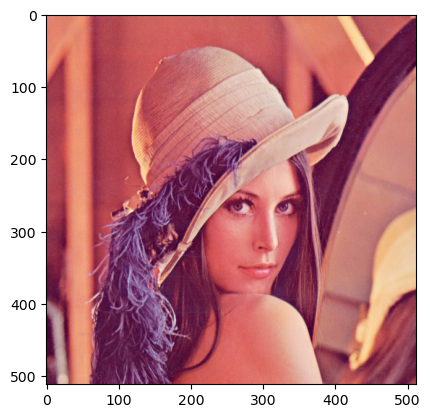

In [3]:
plt.imshow(image_lena)

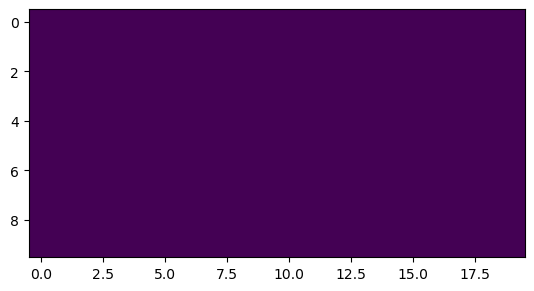

In [4]:
A = np.zeros( (10,20), dtype = np.uint8)

B = np.copy(A)

C = np.array([
    [1,2],
    [3,4],
    [5,6]
], dtype= np.Uint64)

plt.imshow(A)



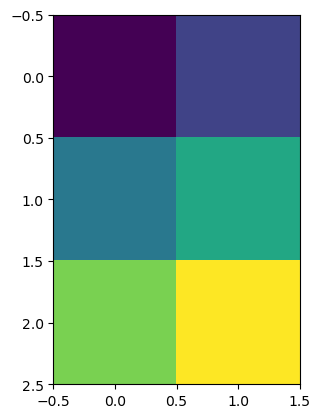

In [5]:
plt.imshow(C)

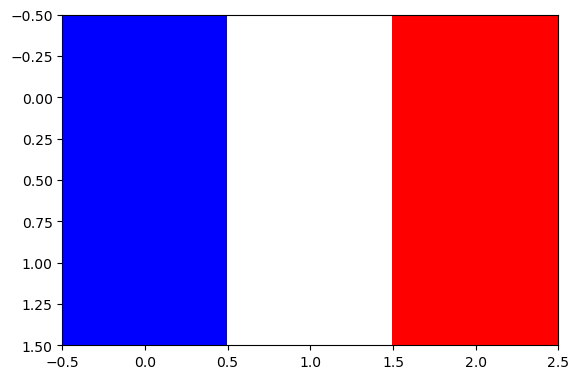

In [6]:
red = [255, 0, 0]
white = [255, 255, 255]
blue = [0,0, 255]

france_flag = np.array([[blue, white, red], [blue, white, red]])

plt.imshow(france_flag)

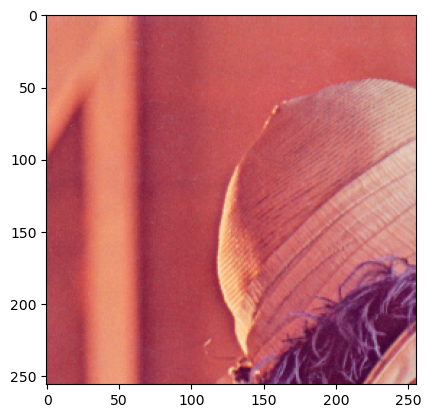

In [7]:
def quadrant(image, i, j):

    x, y, _  = np.shape(image)
    x /= 2
    y /= 2

    return image[int(x) * (i-1):int(x) * i, int(y) * (j-1):int(y) * j]

plt.imshow(quadrant(image_lena,1,1))

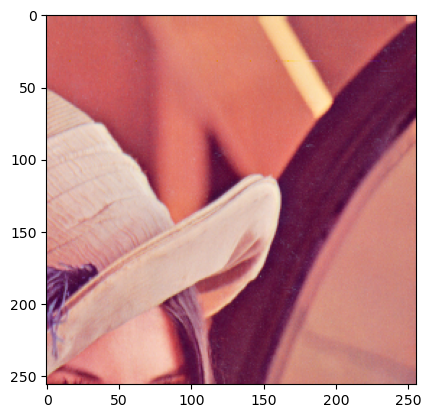

In [8]:
plt.imshow(quadrant(image_lena,1,2))

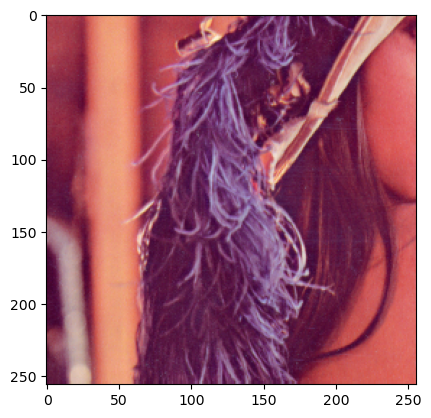

In [9]:
plt.imshow(quadrant(image_lena, 2, 1))

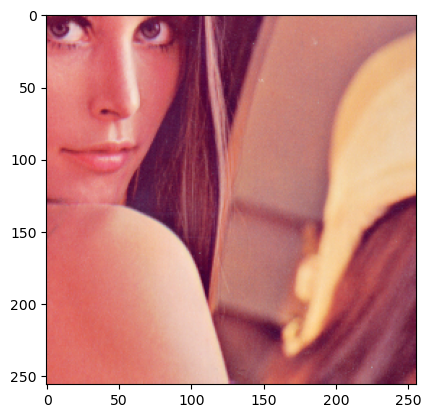

In [10]:
plt.imshow(quadrant(image_lena, 2, 2))

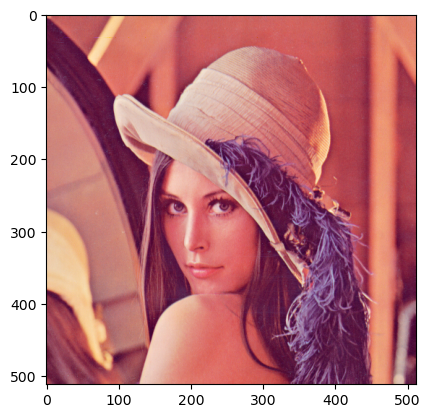

In [11]:
def symetrie(image):

    return np.fliplr(image)

plt.imshow(symetrie(image_lena))

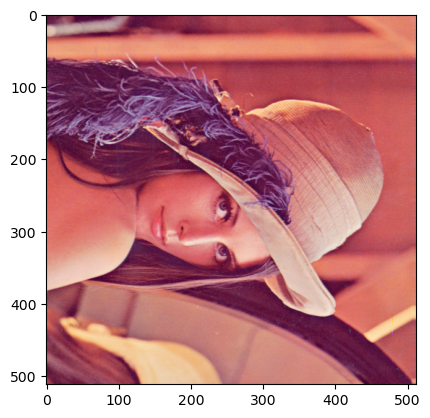

In [12]:
def rotation(image):
    return np.rot90(image,3)

plt.imshow(rotation(image_lena))

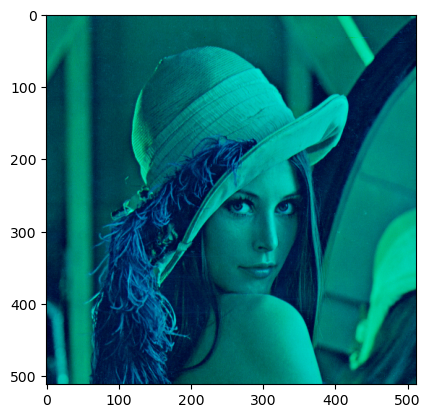

In [13]:
def composante(image, k):

    x,y,z = np.shape(image)

    new_image = np.copy(image)

    for i in range(x):
        for j in range(y):

            new_image[i,j,k-1] = 0
    
    return new_image

plt.imshow(composante(image_lena, 1))


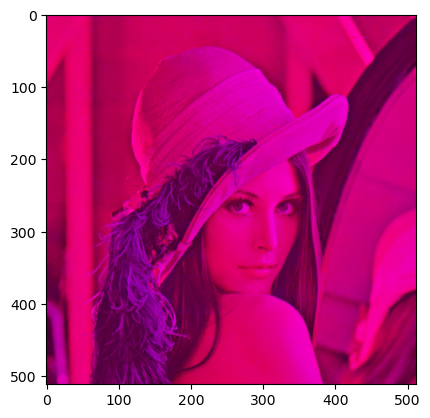

In [14]:
plt.imshow(composante(image_lena,2))

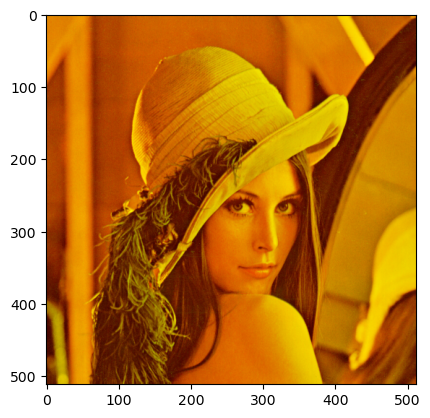

In [15]:
plt.imshow(composante(image_lena,3))

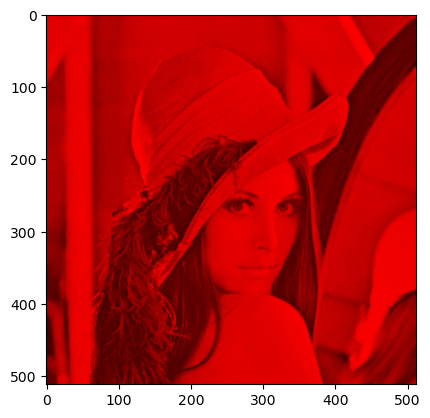

In [16]:

def primaire(image, k):

    x,y,z = np.shape(image)

    new_image = np.copy(image)

    for i in range(x):
        for j in range(y):

            if k == 1:
                new_image[i,j,1], new_image[i,j,2] = 0,0
            
            elif k == 2:
                new_image[i,j,0], new_image[i,j,2] = 0, 0
            
            elif k == 3:
                new_image[i,j,0], new_image[i,j,1] = 0,0
    
 

    return new_image

plt.imshow(primaire(image_lena,1))


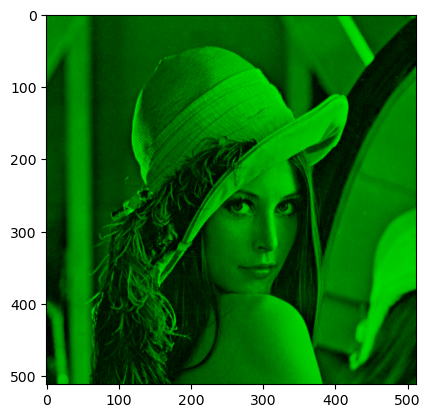

In [17]:
plt.imshow(primaire(image_lena,2))

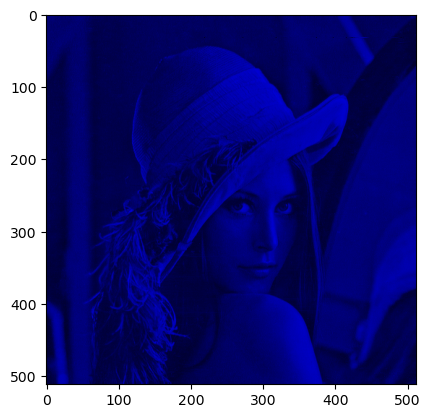

In [18]:
plt.imshow(primaire(image_lena,3))

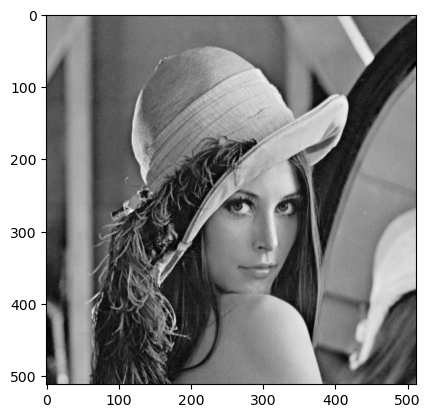

In [19]:
def to_grey(image):

    # Dimension de l'image
    x, y, _ = np.shape(image)

    # Nouvelle matrice de la taille de l'image (créée avec des 0)
    grey_pic = np.zeros(np.shape(image)[:2])

    # Conversion en gris
    for i in range(x):
        for j in range(y):
            grey_pic[i,j] = int(image[i,j,0] * 299/1000) +\
                            int(image[i,j,1] * 587/1000) +\
                            int(image[i,j,2] * 144/1000)

    return grey_pic

plt.imshow(to_grey(image_lena), cmap="gray")

La complexité de ces opération est assez faible car il s'agit tout simplement d'additions et de produits.

## Transformation avancées

### Pixellisation



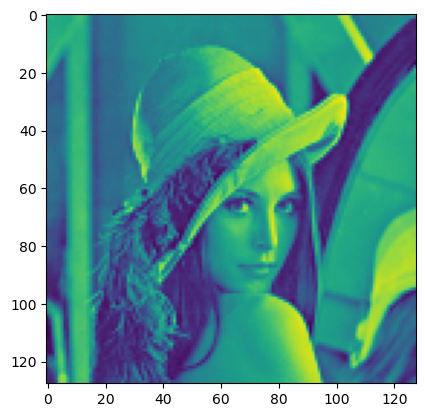

In [20]:
def pixellise(image, p):

    new_image = np.zeros((p,p))

    x, y, _ = np.shape(image)

    x /= p
    y /= p

    x, y = int(x), int(y)
    for i in range(p):
        for j in range(p):

            new_image[i,j] = np.mean(image[x*i : x*(i+1), y*j : y*(j+1)])

    return new_image

plt.imshow(pixellise(image_lena,128))


### Lissage (ou floutage)

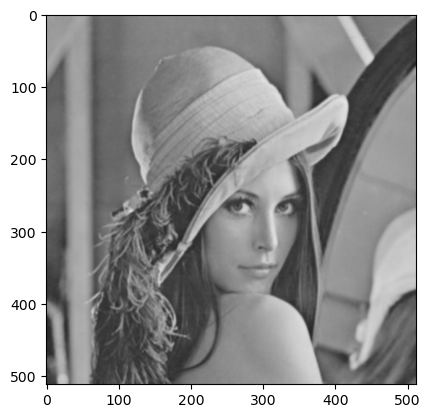

In [21]:
def lissage(image):

    new_image = np.copy(image)

    x, y, _ = np.shape(image)

    a1,a2,b1,b2 = 0,0,0,0 # sélecteur pour les slices

    for i in range(x):

        if i == 0:
            a1, a2 = 0,2
        
        elif i == x-1:
            a1, a2 = x-2,x
        
        else:
            a1, a2 = i-1, i+2

        
        for j in range(y):
            if j == 0:
                b1, b2 = 0,2
        
            elif j == x-1:
                b1, b2 = y-2,y
        
            else:
                b1, b2 = j-1, j+2


            new_image[i,j] = np.mean(image[a1:a2, b1:b2])


    return new_image

plt.imshow(lissage(image_lena))

Cependant, on peut aussi utiliser des convolutions de matrices faisant office de masques.

In [23]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])

a[:,:]


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

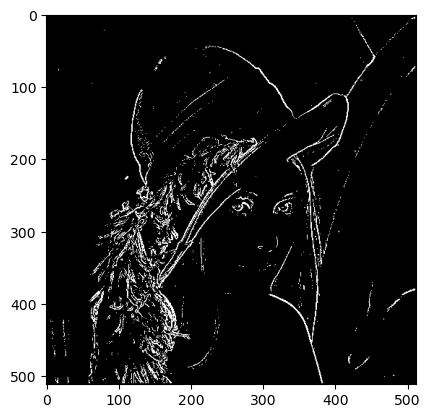

In [31]:
def contour(img, seuil):

    y_dim, x_dim = np.shape(img)
    G = np.zeros((y_dim, x_dim))
    for i in range(y_dim-1):
        for j in range(x_dim-1):
            G[i,j] = (img[i+1,j]-img[i,j])**2 + (img[i,j+1]-img[i,j])**2
    G_max = np.amax(G)
    v_seuil = seuil * G_max
    contour = np.zeros((y_dim, x_dim))
    for i in range(y_dim-1):
        for j in range(x_dim-1):
            if G[i,j] > v_seuil:
                contour[i,j] = 255
    plt.imshow(contour, cmap = 'gray')
    return contour

contour(to_grey(image_lena), seuil=0.05)